# Optional Lab: Multiple Variable Linear Regression

In this lab, you will extend the data structures and previously developed routines to support multiple features. Several routines are updated making the lab appear lengthy, but it makes minor adjustments to previous routines making it quick to review.
# Outline
- [&nbsp;&nbsp;1.1 Goals](#toc_15456_1.1)
- [&nbsp;&nbsp;1.2 Tools](#toc_15456_1.2)
- [&nbsp;&nbsp;1.3 Notation](#toc_15456_1.3)
- [2 Problem Statement](#toc_15456_2)
- [&nbsp;&nbsp;2.1 Matrix X containing our examples](#toc_15456_2.1)
- [&nbsp;&nbsp;2.2 Parameter vector w, b](#toc_15456_2.2)
- [3 Model Prediction With Multiple Variables](#toc_15456_3)
- [&nbsp;&nbsp;3.1 Single Prediction element by element](#toc_15456_3.1)
- [&nbsp;&nbsp;3.2 Single Prediction, vector](#toc_15456_3.2)
- [4 Compute Cost With Multiple Variables](#toc_15456_4)
- [5 Gradient Descent With Multiple Variables](#toc_15456_5)
- [&nbsp;&nbsp;5.1 Compute Gradient with Multiple Variables](#toc_15456_5.1)
- [&nbsp;&nbsp;5.2 Gradient Descent With Multiple Variables](#toc_15456_5.2)
- [6 Congratulations](#toc_15456_6)


<a name="toc_15456_1.1"></a>
## 1.1 Goals
- Extend our regression model  routines to support multiple features
    - Extend data structures to support multiple features
    - Rewrite prediction, cost and gradient routines to support multiple features
    - Utilize NumPy `np.dot` to vectorize their implementations for speed and simplicity

<a name="toc_15456_1.2"></a>
## 1.2 Tools
In this lab, we will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [52]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2) # Reduce the precision of the output

<a name="toc_15456_1.3"></a>
## 1.3 Notation
Here is a summary of some of the notation you will encounter, updated for multiple features.
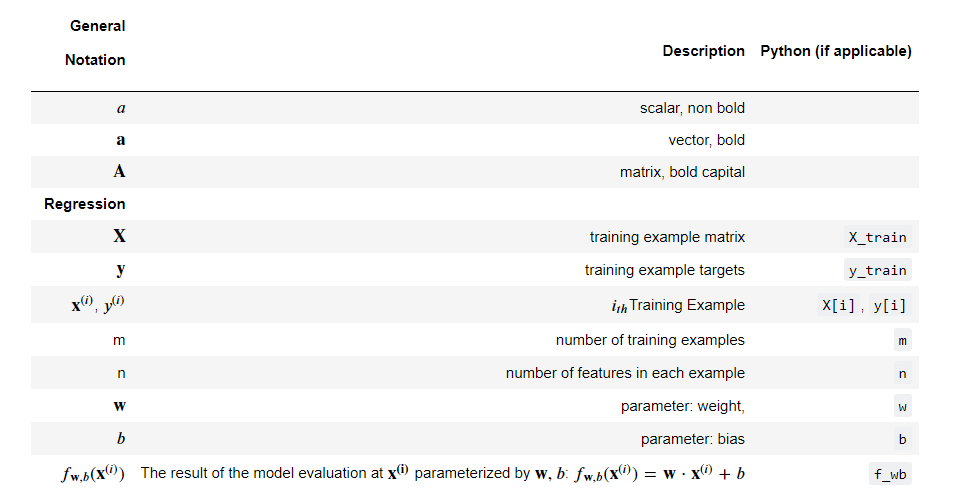

<a name="toc_15456_2"></a>
# 2 Problem Statement

You will use the motivating example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.  Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.  

Please run the following code cell to create your `X_train` and `y_train` variables.

In [53]:
# Create X_train and y_train
X_train = np.array([[2104, 5, 1, 45],
                    [1416, 3, 2, 40],
                    [1534, 3, 2, 30]])

y_train = np.array([460, 232, 315])

<a name="toc_15456_2.1"></a>
## 2.1 Matrix X containing our examples
Similar to the table above, examples are stored in a NumPy matrix `X_train`. Each row of the matrix represents one example. When you have $m$ training examples ( $m$ is three in our example), and there are $n$ features (four in our example), $\mathbf{X}$ is a matrix with dimensions ($m$, $n$) (m rows, n columns).


$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.  

Display the input data.

In [54]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [1534    3    2   30]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 315]


<a name="toc_15456_2.2"></a>
## 2.2 Parameter vector w, b

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.  

In [62]:
# Initalize the weights
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


<a name="toc_15456_3"></a>
# 3 Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

<a name="toc_15456_3.1"></a>
## 3.1 Single Prediction element by element
Our previous prediction multiplied one feature value by one parameter and added a bias parameter. A direct extension of our previous implementation of prediction to multiple features would be to implement (1) above using loop over each element, performing the multiply with its parameter and then adding the bias parameter at the end.


In [63]:
def predict_single_loop(x, w, b):
    """
    Single prediction using a linear regression model

    Args:
        x (ndarray): shape(n, ) example with multiple features
        w (ndarray): shape(n, ) model weights
        b (scalar): model bias
    return:
        p (scalar): model prediction
    """

    n = x.shape[0] # Number of features
    p = 0
    for i in range(n):
        p_i = x[i] * w[i] # Compute the prediction for a single example
        p = p + p_i # Sum the weighted features
    p = p + b # Add the bias
    return p

In [64]:
# Get a row from the training data
x_vector = X_train[0, :]
print(f"x_vector shape: {x_vector.shape}, x_vector type: {type(x_vector)}")

# Make a prediction using the initial weights
f_wb = predict_single_loop(x_vector, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, Prediction: {f_wb}")

x_vector shape: (4,), x_vector type: <class 'numpy.ndarray'>
f_wb shape (), Prediction: 459.9999976194083


<a name="toc_15456_3.2"></a>
## 3.2 Single Prediction, vector

Noting that equation (1) above can be implemented using the dot product as in (2) above. We can make use of vector operations to speed up predictions.

Recall from the Python/Numpy lab that NumPy `np.dot()`[[link](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)] can be used to perform a vector dot product. 

In [65]:
# Use dot product to make a prediction - faster
def predict_vectorized(x, w, b):
    """
    Make a prediction using a linear regression model

    Args:
        x (ndarray): shape(m, n) matrix of m examples with n features
        w (ndarray): shape(n, ) model weights
        b (scalar): model bias
    return:
        p (scalar): shape(m, ) model predictions for m examples
    """

    p = np.dot(x, w) + b
    return p


In [67]:
# Get a row from the training data
x_vector = X_train[0, :]
print(f"x_vector shape: {x_vector.shape}, x_vector type: {type(x_vector)}")

# Make a prediction using the initial weights
f_wb = predict_vectorized(x_vector, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, Prediction: {f_wb}")

x_vector shape: (4,), x_vector type: <class 'numpy.ndarray'>
f_wb shape (), Prediction: 459.9999976194083


The results and shapes are the same as the previous version which used looping. Going forward, `np.dot` will be used for these operations. The prediction is now a single statement. Most routines will implement it directly rather than calling a separate predict routine.

<a name="toc_15456_4"></a>
# 4 Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [68]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b  # (n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i]) ** 2  # scalar
        cost = cost / (2 * m)  # scalar
    return cost

In [69]:
# Compute the cost using the initial weights
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f"Cost at optimal w: {cost}")

Cost at optimal w: 8617.757459698756
